## Normalization and Standardization

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import pylab
# %matplotlib inline

In [46]:
df=pd.read_csv('../HandleMissingValues/train.csv', usecols=['Pclass', 'Age', 'Survived', 'Fare'])

In [47]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [48]:
df['Age'].fillna(df.Age.median(), inplace=True)

In [49]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

### Standard Scaler

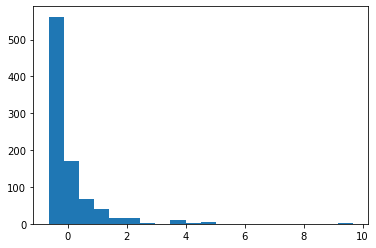

In [68]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

# Converting it into DataFrame
pd.DataFrame(df_scaled)

plt.hist(df_scaled[:,3], bins=20)
plt.show()




### Min-Max Scaling
- It is used to scale values between 0 to 1

In [58]:
from sklearn.preprocessing import MinMaxScaler

min_max=MinMaxScaler()

# Changed to DataFrame
df_minMax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)

df_minMax.head()


,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


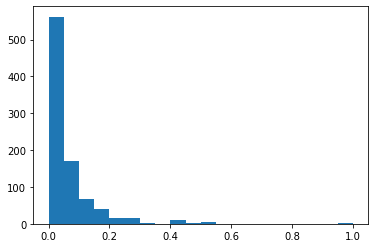

In [62]:
plt.hist(df_minMax['Fare'], bins=20)
plt.show()

### Robust Scaler
- Use this in presence of Outliers it is more Robust

In [64]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
df_robust=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_robust.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


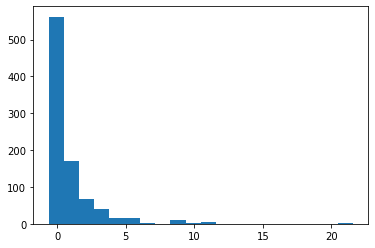

In [67]:
plt.hist(df_robust['Fare'], bins=20)
plt.show()

### Gausian Transformation

Some Machine Learning algo such as logistic and linear assume that the features are normally distributed 
 It will hence give
 - Better Accuracy
 - Performance

If it is not normally distributed then we apply the following methods to convert them into the following transformations 
<br/>Such as
 - Logarithmic Transformation
 - Recipocal Transformation
 - Square Root Transformation
 - Exponential Transformation
 - Boxcox Transformation

In [69]:
df=pd.read_csv('../HandleMissingValues/train.csv', usecols=[ 'Age', 'Survived', 'Fare'])

In [70]:
df['Age'].fillna(df.Age.median(), inplace=True)


#### To check wheter the feature is gaussian or normal distributed . Q-Q plot is used

In [73]:
def plot_data(df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()

    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()
    
